In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras

### MNIST 

In [3]:
# MNIST Dataset

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#### Model

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation= tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 79us/step - loss: 0.2707 - acc: 0.9193 - val_loss: 0.1461 - val_acc: 0.9572
Epoch 2/3
60000/60000 [==============================] - 4s 66us/step - loss: 0.1107 - acc: 0.9654 - val_loss: 0.1018 - val_acc: 0.9675
Epoch 3/3
60000/60000 [==============================] - 4s 68us/step - loss: 0.0752 - acc: 0.9761 - val_loss: 0.1011 - val_acc: 0.9710


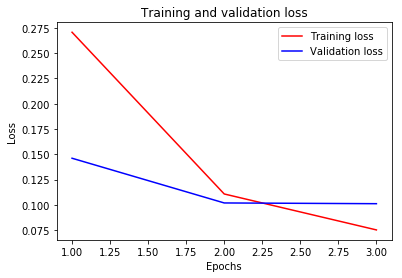

In [7]:
import matplotlib.pyplot as plt

# Loss v/s Epochs

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(val_acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

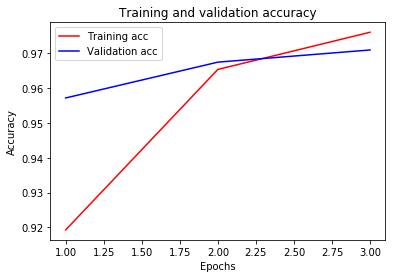

In [8]:
plt.clf() 

# Accuracy v/s Epochs

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
#Prediction
predictions = model.predict([x_test])
print(np.argmax(predictions[97]))

7


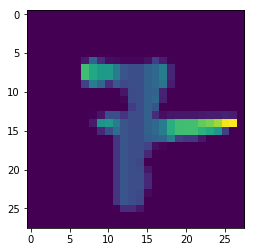

In [13]:
plt.imshow(x_test[97])